<a href="https://colab.research.google.com/github/NguyenthanhTung14/Nguy-nThanhT-ng/blob/main/bai_cuoi_ki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [43]:
folder = '/content/drive/MyDrive/FILE_ANH_AI/Animals/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('cat'):
    output= 1.0
  if file.startswith('cow'):
    output= 2.0
  if file.startswith('dog'):
    output= 3.0
  if file.startswith('duck'):
    output= 4.0
  if file.startswith('elephant'):
    output= 5.0
  if file.startswith('horse'):
    output= 6.0
  if file.startswith('monkey'):
    output= 7.0
  if file.startswith('rabbit'):
    output= 8.0
  if file.startswith('sheep'):
    output= 9.0
  if file.startswith('snake'):
    output= 10.0              
  photo = load_img(folder + file, target_size= (40,40))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

In [44]:
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/npy_Data/animals_photos.npy', photos)
save('/content/drive/MyDrive/npy_Data/animals_labels.npy', labels)

(1008, 40, 40, 3) (1008,)


In [45]:
# Split data into train & test
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [46]:
print(test_x.shape, train_x.shape)

(50, 40, 40, 3) (958, 40, 40, 3)


In [47]:
train_x = train_x.reshape((958, 40, 40, 3)) #sửa lại cho giống như ma trận hàng trêntrên
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((50, 40, 40, 3))
test_x = test_x.astype('float32')/255

In [48]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,11) #bao nhiu output thì sửa lạilại
test_y = to_categorical(test_y,11)

In [62]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 64
epochs = 5
classes = 11 # bao nhiêu output thì sửa lại 

In [63]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (40, 40, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [64]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 20, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 20, 20, 64)        36928     
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                      

In [97]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)


Epoch 1/5
15/15 [==============================] - 4s 23ms/step - loss: 0.1023 - accuracy: 0.9864
Epoch 2/5
15/15 [==============================] - 0s 18ms/step - loss: 0.1228 - accuracy: 0.9697
Epoch 3/5
15/15 [==============================] - 0s 18ms/step - loss: 0.2131 - accuracy: 0.9530
Epoch 4/5
15/15 [==============================] - 0s 18ms/step - loss: 0.0778 - accuracy: 0.9770
Epoch 5/5
15/15 [==============================] - 0s 18ms/step - loss: 0.0471 - accuracy: 0.9916


In [98]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

2/2 [==============================] - 0s 11ms/step - loss: 10.9134 - accuracy: 0.1600
Test accuracy: 0.1599999964237213


In [99]:
model.save('/content/drive/MyDrive/Colab Notebooks/Data/animals.h5')

1/1 [==============================] - 0s 163ms/step
cat


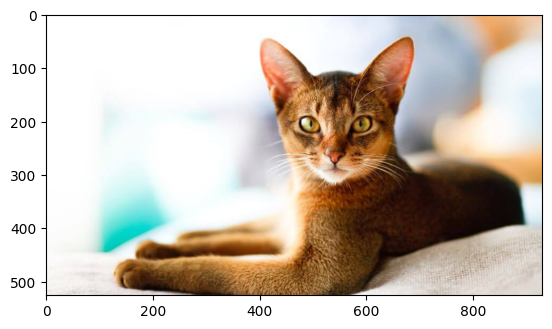

1/1 [==============================] - 0s 23ms/step
duck


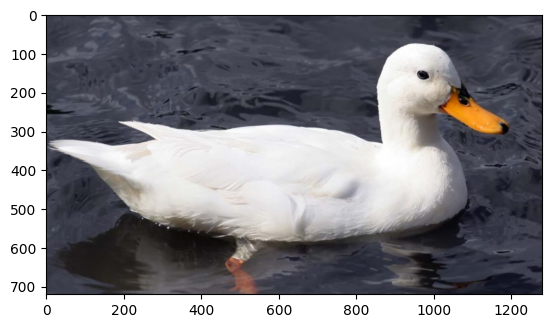

1/1 [==============================] - 0s 25ms/step
horse


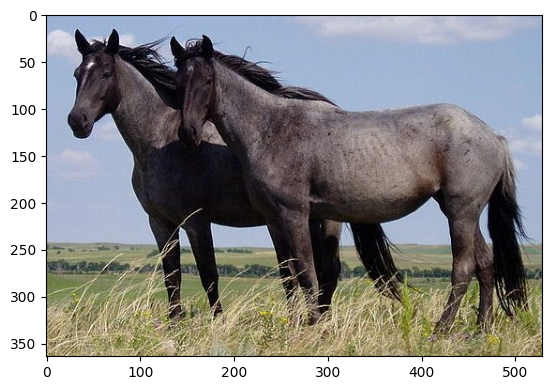

1/1 [==============================] - 0s 21ms/step
snake


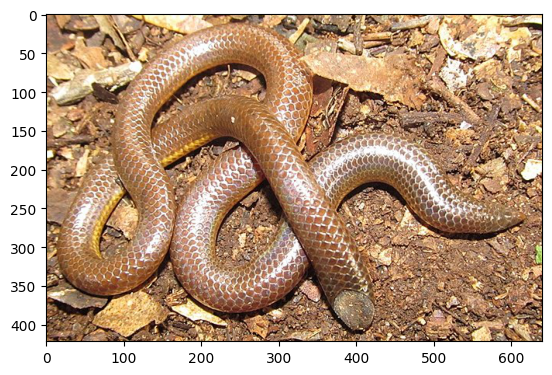

1/1 [==============================] - 0s 22ms/step
dog


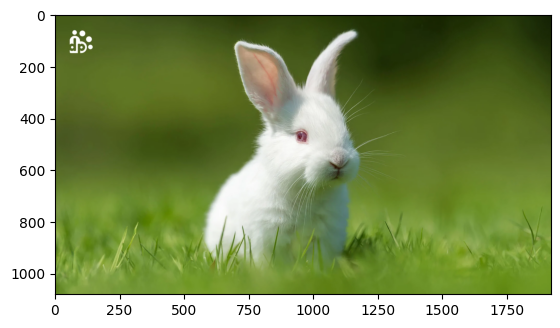

1/1 [==============================] - 0s 24ms/step
sheep


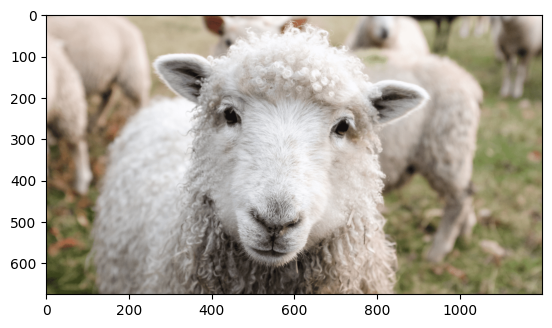

1/1 [==============================] - 0s 22ms/step
elephant


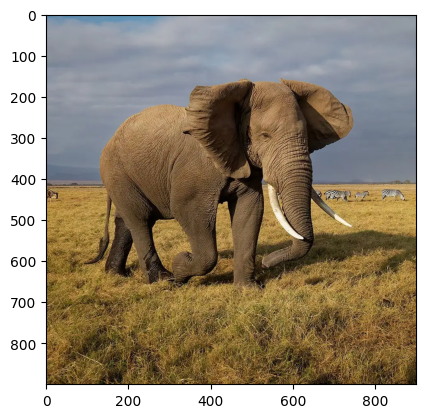

1/1 [==============================] - 0s 40ms/step
cow


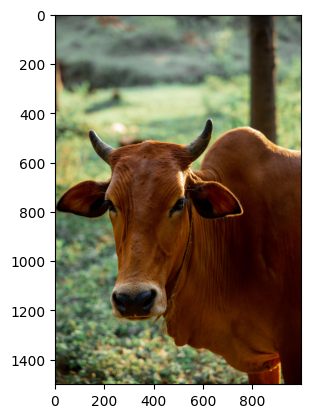

1/1 [==============================] - 0s 28ms/step
monkey


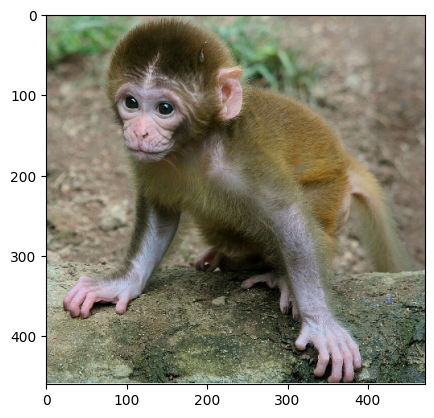

1/1 [==============================] - 0s 35ms/step
cat


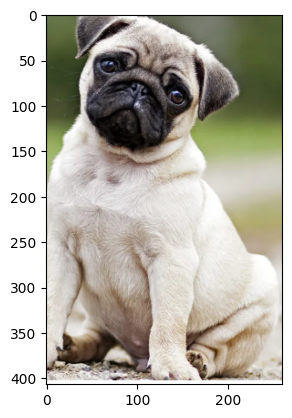

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/FILE_ANH_AI/Test_animals/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (40, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','cat', 'cow', 'dog', 'duck', 'elephant', 'horse', 'monkey', 'rabbit', 'sheep', 'snake']
  print(class_name[result])
  plt.show()

Mounted at /content/drive
